<a href="https://colab.research.google.com/github/lzziuhh/machine_learning/blob/master/yolov5_large_kaggle_cots_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook based on below works, please vote!!!

https://www.kaggle.com/ammarnassanalhajali/barrier-reef-yolov5-training

since the limit of Kaggle GPU usage, I applied this notebook to colab

# Google drive connection

In [1]:
import glob
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive

!ls /mydrive

Mounted at /content/gdrive
 bangali	    download	       JTdemo  'My Drive'
'Colab Notebooks'   download.gslides   kaggle


# Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab

In [3]:
!pip install kaggle

# Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


# Using the Kaggle API

For a more complete list of what you can do with the API, visit https://github.com/Kaggle/kaggle-api.

## Listing competitions

In [5]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         87           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        109           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        910           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        153           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1842           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13816            True  
house-pr

## Downloading a dataset

In [6]:
# !kaggle competitions download -c tensorflow-great-barrier-reef
#↑not works, only download about 40 pictures. 
# found dataset can be downloaded(thanks the help)
!kaggle datasets download -d yondraco/tensorflowgreatbarrierreef

100% 14.2G/14.2G [02:34<00:00, 93.1MB/s]
100% 14.2G/14.2G [02:34<00:00, 98.4MB/s]


In [7]:
# unzip the download dataset
!mkdir /kaggle
!mkdir /kaggle/input
!mkdir /kaggle/input/tensorflow-great-barrier-reef
!unzip -q ./tensorflowgreatbarrierreef.zip -d /kaggle/input/tensorflow-great-barrier-reef

In [8]:
%mkdir /kaggle/working
%cd /kaggle/working

/kaggle/working


# Check GPU Type

In [9]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jan  7 10:59:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 🚀 Barrier Reef YOLOv5 [Training]

### Hi kagglers, This is `Training` notebook using `YOLOv5`.


### Other notebooks in the competition
- [Barrier Reef YOLOv5 [Inference]](https://www.kaggle.com/ammarnassanalhajali/barrier-reef-yolov5-inference/edit)



### Please if this kernel is useful, <font color='red'>please upvote !!</font>

# 📚 YOLOv5
YOLO, "You Only Look Once", has a long and succesful history with real time object detection.

#  ⬇️ Download YOLOv5
Clone this repo and install requirements.txt dependencies, including Python>=3.8 and PyTorch>=1.7.

In [10]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

# Install dependencies
%pip install -qr requirements.txt  

# change directory
%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 10485, done.
remote: Total 10485 (delta 0), reused 0 (delta 0), pack-reused 10485
Receiving objects: 100% (10485/10485), 10.65 MiB | 32.94 MiB/s, done.
Resolving deltas: 100% (7250/7250), done.
/kaggle/working/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
/kaggle/working
Setup complete. Using torch 1.10.0+cu111 (Tesla P100-PCIE-16GB)


In [11]:
!add-apt-repository ppa:ubuntu-toolchain-r/test -y
!apt-get update
!apt-get upgrade libstdc++6 -y

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:15 http://ppa

# 🔨 Weights & Biases
* Weights & Biases is a set of tools that tracks machine learning experiments, visualizes metrics, and shares results.
* Weights & Biases is directly integrated into YOLOv5, providing experiment metric tracking, model and dataset versioning, rich model prediction visualization, and more.

In [12]:
# Install W&B 
!pip install -q --upgrade wandb

# # Login 
# import wandb

# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient() 

# personal_key_for_api = user_secrets.get_secret("ke")
# ! wandb login $personal_key_for_api

# %pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 97 kB 8.4 MB/s 
     |████████████████████████████████| 180 kB 67.3 MB/s 
     |████████████████████████████████| 140 kB 70.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# ☀️ Importing Libraries

In [13]:
import warnings
warnings.filterwarnings("ignore")

from itertools import groupby
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import pandas as pd
import os
import pickle
import cv2
from multiprocessing import Pool
import matplotlib.pyplot as plt
# import cupy as cp
import ast
import glob
from os import listdir
from os.path import isfile, join
from glob import glob
import yaml

import shutil
from shutil import copyfile
import sys

from joblib import Parallel, delayed

# --- Read data ---
TRAIN_PATH = '/kaggle/input/tensorflow-great-barrier-reef'

# 🔨 Functions

In [14]:
def get_bbox(annots):
    bboxes = [list(annot.values()) for annot in annots]
    return bboxes
def get_path(row):
    row['image_path'] = f'{TRAIN_PATH}/train_images/video_{row.video_id}/{row.video_frame}.jpg'
    return row
def load_image(image_path):
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def coco2yolo(image_height, image_width, bboxes):
    """
    coco => [xmin, ymin, w, h]
    yolo => [xmid, ymid, w, h] (normalized)
    """
    
    bboxes = bboxes.copy().astype(float) # otherwise all value will be 0 as voc_pascal dtype is np.int
    
    # normolizinig
    bboxes[..., [0, 2]]= bboxes[..., [0, 2]]/ image_width
    bboxes[..., [1, 3]]= bboxes[..., [1, 3]]/ image_height
    
    # converstion (xmin, ymin) => (xmid, ymid)
    bboxes[..., [0, 1]] = bboxes[..., [0, 1]] + bboxes[..., [2, 3]]/2
    
    return bboxes

def yolo2coco(image_height, image_width, bboxes):
    """
    yolo => [xmid, ymid, w, h] (normalized)
    coco => [xmin, ymin, w, h]
    
    """ 
    bboxes = bboxes.copy().astype(float) # otherwise all value will be 0 as voc_pascal dtype is np.int
    
    # denormalizing
    bboxes[..., [0, 2]]= bboxes[..., [0, 2]]* image_width
    bboxes[..., [1, 3]]= bboxes[..., [1, 3]]* image_height
    
    # converstion (xmid, ymid) => (xmin, ymin) 
    bboxes[..., [0, 1]] = bboxes[..., [0, 1]] - bboxes[..., [2, 3]]/2
    
    return bboxes
def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [0, 0, 255], thickness=tf, lineType=cv2.LINE_AA)



def draw_bboxes(img, bboxes, classes, class_ids, colors = None, show_classes = None, bbox_format = 'yolo', class_name = False, line_thickness = 2):  
    image = img.copy()
    show_classes = classes if show_classes is None else show_classes
    colors = (0, 255 ,0) if colors is None else colors
    
    if bbox_format == 'yolo':
        
        for idx in range(len(bboxes)):  
            
            bbox  = bboxes[idx]
            cls   = classes[idx]
            cls_id = class_ids[idx]
            color = colors[cls_id] if type(colors) is list else colors
            
            if cls in show_classes:
            
                x1 = round(float(bbox[0])*image.shape[1])
                y1 = round(float(bbox[1])*image.shape[0])
                w  = round(float(bbox[2])*image.shape[1]/2) #w/2 
                h  = round(float(bbox[3])*image.shape[0]/2)

                voc_bbox = (x1-w, y1-h, x1+w, y1+h)
                plot_one_box(voc_bbox, 
                             image,
                             color = color,
                             label = cls if class_name else str(get_label(cls)),
                             line_thickness = line_thickness)
            
    elif bbox_format == 'coco':
        
        for idx in range(len(bboxes)):  
            
            bbox  = bboxes[idx]
            cls   = classes[idx]
            cls_id = class_ids[idx]
            color = colors[cls_id] if type(colors) is list else colors
            
            if cls in show_classes:            
                x1 = int(round(bbox[0]))
                y1 = int(round(bbox[1]))
                w  = int(round(bbox[2]))
                h  = int(round(bbox[3]))

                voc_bbox = (x1, y1, x1+w, y1+h)
                plot_one_box(voc_bbox, 
                             image,
                             color = color,
                             label = cls if class_name else str(cls_id),
                             line_thickness = line_thickness)

    elif bbox_format == 'voc_pascal':
        
        for idx in range(len(bboxes)):  
            
            bbox  = bboxes[idx]
            cls   = classes[idx]
            cls_id = class_ids[idx]
            color = colors[cls_id] if type(colors) is list else colors
            
            if cls in show_classes: 
                x1 = int(round(bbox[0]))
                y1 = int(round(bbox[1]))
                x2 = int(round(bbox[2]))
                y2 = int(round(bbox[3]))
                voc_bbox = (x1, y1, x2, y2)
                plot_one_box(voc_bbox, 
                             image,
                             color = color,
                             label = cls if class_name else str(cls_id),
                             line_thickness = line_thickness)
    else:
        raise ValueError('wrong bbox format')

    return image

np.random.seed(8)
colors = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
colors=(255,0,0)

# 🍘 Hyperparameters

In [15]:
BATCH_SIZE = 8
EPOCHS = 30
IMG_SIZE=1280
Selected_Fold=4  #0..4

# 🍮 Loading Data

In [16]:
# Read in the data CSV files
df = pd.read_csv("/kaggle/input/tensorflow-great-barrier-reef/train.csv")
df.head(5)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]



# BBoxes
##### 📌 Note 
> We can see there are many images without any BBox. 

In [17]:
df["NumBBox"]=df['annotations'].apply(lambda x: str.count(x, 'x'))
df.head(5)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,NumBBox
0,0,40258,0,0,0-0,[],0
1,0,40258,1,1,0-1,[],0
2,0,40258,2,2,0-2,[],0
3,0,40258,3,3,0-3,[],0
4,0,40258,4,4,0-4,[],0


In [18]:
print(df["NumBBox"].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 15 18]


In [19]:
df_train=df[df["NumBBox"]>0]
df_train.sample(2)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,NumBBox
12642,1,60754,9077,661,1-9077,"[{'x': 506, 'y': 568, 'width': 28, 'height': 3...",7
12784,1,60754,9219,803,1-9219,"[{'x': 336, 'y': 582, 'width': 65, 'height': 5...",5


In [20]:
print(df_train['NumBBox'].sum())

11898


> We have just 4919 images with 11898 BBox, we will use them in training.

In [21]:
df_train['annotations'] = df_train['annotations'].progress_apply(lambda x: ast.literal_eval(x))
df_train['bboxes'] = df_train.annotations.progress_apply(get_bbox)
df_train.sample(2)

  0%|          | 0/4919 [00:00<?, ?it/s]

  0%|          | 0/4919 [00:00<?, ?it/s]

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,NumBBox,bboxes
11059,1,8503,5907,2079,1-5907,"[{'x': 4, 'y': 3, 'width': 65, 'height': 63}, ...",3,"[[4, 3, 65, 63], [19, 406, 40, 59], [0, 466, 3..."
4769,0,53708,8946,61,0-8946,"[{'x': 975, 'y': 411, 'width': 36, 'height': 3...",2,"[[975, 411, 36, 32], [1032, 471, 34, 30]]"


# Size of Images
##### 📌 Note 
> All images have Width=1280 & Height=720 

In [22]:
df_train["Width"]=1280
df_train["Height"]=720
df_train.sample(2)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,NumBBox,bboxes,Width,Height
5530,0,53708,9707,822,0-9707,"[{'x': 496, 'y': 210, 'width': 41, 'height': 34}]",1,"[[496, 210, 41, 34]]",1280,720
251,0,40258,251,251,0-251,"[{'x': 897, 'y': 286, 'width': 37, 'height': 35}]",1,"[[897, 286, 37, 35]]",1280,720


# Path of Images

In [23]:
df_train = df_train.progress_apply(get_path, axis=1)
df_train.sample(2)

  0%|          | 0/4919 [00:00<?, ?it/s]

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,NumBBox,bboxes,Width,Height,image_path
9347,1,8503,4195,367,1-4195,"[{'x': 346, 'y': 310, 'width': 40, 'height': 3...",11,"[[346, 310, 40, 30], [76, 346, 68, 54], [561, ...",1280,720,/kaggle/input/tensorflow-great-barrier-reef/tr...
158,0,40258,158,158,0-158,"[{'x': 618, 'y': 296, 'width': 52, 'height': 55}]",1,"[[618, 296, 52, 55]]",1280,720,/kaggle/input/tensorflow-great-barrier-reef/tr...


# 🌈 Visualizing BBoxes

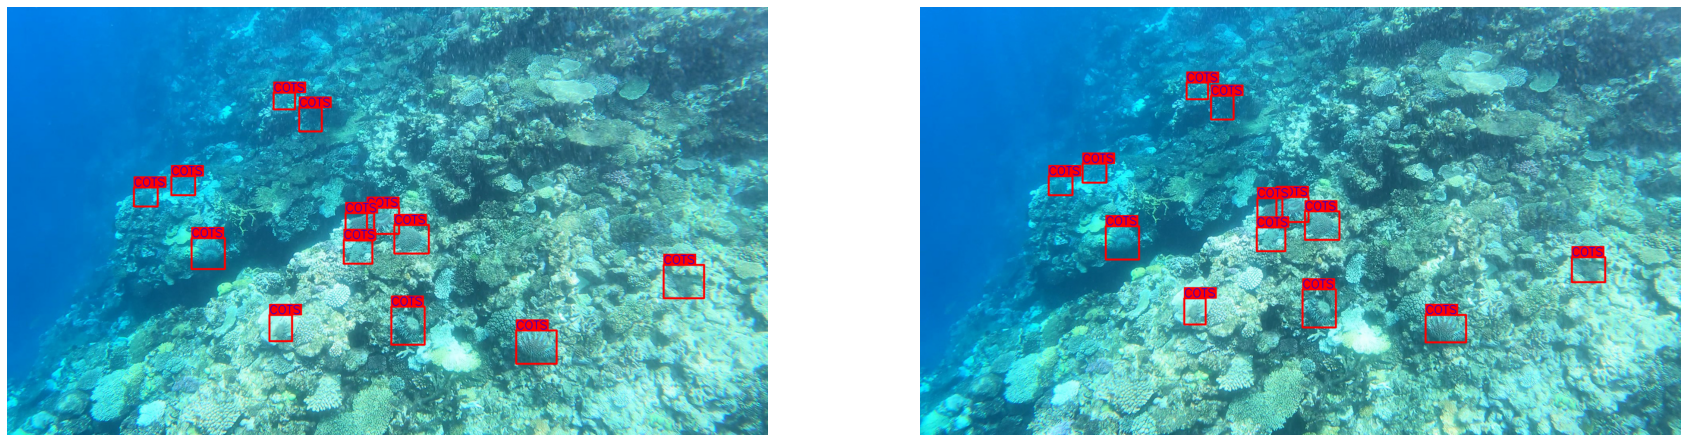

In [24]:
df_v = df_train[(df_train.NumBBox==13)].sample(2) 
fig,ax = plt.subplots(1,2,figsize=(30,20))
i=0;
for index, row in df_v.iterrows():
    img           = load_image(row.image_path)
    image_height  = row.Height
    image_width   = row.Width
    bboxes_coco   = np.array(row.bboxes)
    bboxes_yolo   = coco2yolo(image_height, image_width, bboxes_coco)
    names         = ['COTS']*len(bboxes_coco)
    labels        = [0]*len(bboxes_coco)
    im=draw_bboxes(img = img,
                           bboxes = bboxes_yolo, 
                           classes = names,
                           class_ids = labels,
                           class_name = True, 
                           colors = colors, 
                           bbox_format = 'yolo',
                           line_thickness = 2)
    ax[i].imshow(im)
    ax[i].axis('OFF')
    i=i+1

# 🍚 Splitting Dataset

In [25]:
from sklearn.model_selection import GroupKFold
kf = GroupKFold(n_splits = 5) 
df_train = df_train.reset_index(drop=True)
df_train['fold'] = -1
for fold, (train_idx, val_idx) in enumerate(kf.split(df_train, y = df_train.video_id.tolist(), groups=df_train.sequence)):
    df_train.loc[val_idx, 'fold'] = fold
display(df_train.fold.value_counts())

0    1100
3     970
2     968
4     945
1     936
Name: fold, dtype: int64

## 🍚 Organize Directories

I organized train and val images and labels according to the example below.

```
/Kaggle/working
    /COTS
         /images
             /train/img0.jpg
             /val
         /labels
             /train/img0.txt
             /val
    /yolov5
```

In [26]:
pwd

'/kaggle/working'

In [27]:
%cd /kaggle/working

/kaggle/working


In [28]:
os.makedirs('COTS/images/train', exist_ok=True)
os.makedirs('COTS/images/valid', exist_ok=True)
os.makedirs('COTS/labels/train', exist_ok=True)
os.makedirs('COTS/labels/valid', exist_ok=True)

In [29]:
for i in tqdm(range(len(df_train))):
    row = df_train.loc[i]
    if row.fold != Selected_Fold:
        copyfile(f'{row.image_path}', f'COTS/images/train/{row.image_id}.jpg')
    else:
        copyfile(f'{row.image_path}', f'COTS/images/valid/{row.image_id}.jpg') 

  0%|          | 0/4919 [00:00<?, ?it/s]

In [30]:
list1 = os.listdir('/kaggle/working/COTS/images/train') # dir is your directory path
number_files1 = len(list1)
print("Number of images in ./COTS/images/train folder",number_files1)
list2 = os.listdir('/kaggle/working/COTS/images/valid') # dir is your directory path
number_files2 = len(list2)
print("Number of images in ./COTS/images/valid folder",number_files2)

Number of images in ./COTS/images/train folder 3974
Number of images in ./COTS/images/valid folder 945


# 🍜 Create `Data.YAML` file

The `data.yaml`, is the dataset configuration file that defines:

1. the dataset root directory and relative paths to train/val/test image directories (or paths to *.txt files with image paths).
1. the number of classes.
1. a list of class names.

> 📍 Note: The `data.yaml` is created in the `yolov5/data` directory as required. 

In [31]:
import yaml
with open('/kaggle/working/train.txt', 'w') as f:
    for path in glob('/kaggle/working/train/*'):
        f.write(path+'\n')
            
with open('/kaggle/working/val.txt', 'w') as f:
    for path in glob('/kaggle/working/val/*'):
        f.write(path+'\n')

data = dict(
    train = '/kaggle/working/COTS/images/train',
    val = '/kaggle/working/COTS/images/valid',
    
    nc    = 1, # number of classes
    names =  ['cots'] # classes
    )

with open('/kaggle/working/yolov5/data/data.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

%cat /kaggle/working/yolov5/data/data.yaml

names:
- cots
nc: 1
train: /kaggle/working/COTS/images/train
val: /kaggle/working/COTS/images/valid


In [32]:
!ls '/kaggle/working/yolov5/data'

Argoverse.yaml	GlobalWheat2020.yaml  scripts	     xView.yaml
coco128.yaml	hyps		      SKU-110K.yaml
coco.yaml	images		      VisDrone.yaml
data.yaml	Objects365.yaml       VOC.yaml


## 🍮 Create Labels for YOLOv5

To label your images,a `.txt` file with the same name of the image,will be created (if no objects in image, no *.txt file is required)
The *.txt file specifications are:

* One row per object
* Each row is class x_center y_center width height format.
* Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height.
* Class numbers are zero-indexed (start from 0).

> 📍 Note: We don't have to remove the images without bounding boxes from the training or validation sets. 

The label file corresponding to the above image contains 2 persons (class 0) and a tie (class 27):

In [33]:
all_bboxes = []
for row_idx in tqdm(range(df_train.shape[0])):
    row = df_train.iloc[row_idx]
    # Get image
    image_name = row.image_id
    image_height = row.Height
    image_width  = row.Width
    bboxes_coco  = np.array(row.bboxes).astype(np.float32).copy()
    num_bbox     = len(bboxes_coco)
    names        = ['cots']*num_bbox
    labels       = [0]*num_bbox
    if row.fold != Selected_Fold:
        file_name = f'/kaggle/working/COTS/labels/train/{image_name}.txt'
    else:
        file_name = f'/kaggle/working/COTS/labels/valid/{image_name}.txt'

    with open(file_name, 'w') as f:
        bboxes_yolo  = coco2yolo(image_height, image_width, bboxes_coco)
        bboxes_yolo  = np.clip(bboxes_yolo, 0, 1)
        all_bboxes.extend(bboxes_yolo)
        for bbox_idx in range(len(bboxes_yolo)):
            bb=str(bboxes_yolo[bbox_idx])
            bb=bb[1:-1]
            #annot = [str(labels[bbox_idx])]+ list(bboxes_yolo[bbox_idx].astype(str))+(['\n'] if num_bbox!=(bbox_idx+1) else [''])
            annot = str(str(labels[bbox_idx])) + ' ' + bb + '\n'
            annot = ''.join(annot)
            annot = annot.strip('')
            f.write(annot)

  0%|          | 0/4919 [00:00<?, ?it/s]

In [34]:
list1 = os.listdir('/kaggle/working/COTS/labels/train') # dir is your directory path
number_files1 = len(list1)
print("Number of txt file in ./COTS/labels/train folder",number_files1)
list2 = os.listdir('/kaggle/working/COTS/labels/valid') # dir is your directory path
number_files2 = len(list2)
print("Number of txt file in ./COTS/labels/valid folder",number_files2)


Number of txt file in ./COTS/labels/train folder 3974
Number of txt file in ./COTS/labels/valid folder 945


In [35]:
%cat '/kaggle/working/COTS/labels/train/{list1[10]}'

0 0.46210937 0.96666667 0.03203125 0.06388889


# 📦 Select a Model
Select a pretrained model to start training from. 
* I will try YOLO5l

# 🚅 Train with W&B

In [36]:
%cd yolov5/

/kaggle/working/yolov5


All training results are saved to runs/train/ with incrementing run directories, i.e. runs/train/exp2, runs/train/exp3 etc. 

In [39]:
BATCH_SIZE = 7
EPOCHS = 30

In [ ]:
#best_weights = '/kaggle/input/nfl-weights/yolov5/kaggle-reef/exp/weights/best.pt' --weights {best_weights} \
!python train.py --img {IMG_SIZE} \
                 --batch {BATCH_SIZE} \
                 --epochs {EPOCHS} \
                 --data data.yaml \
                 --weights yolov5l.pt \
                 --project kaggle-Reef-5l 

wandb: Currently logged in as: lzziuhh (use `wandb login --relogin` to force relogin)
train: weights=yolov5l.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=30, batch_size=7, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=kaggle-Reef-5l, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-183-g33a67b4 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

In [42]:
!cp -r /kaggle/working/yolov5/kaggle-Reef-5l/exp /content/gdrive/MyDrive/kaggle/Yolo5/ouput5l

# Removing Files

In [ ]:
ls

In [ ]:
# %cd "../"
# path = "COTS"
# shutil.rmtree(path)

# 🖼️ Visualizing and Results

* Weights & Biases (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration among team members.

* During training you will see live updates at https://wandb.ai, and you can create Detailed Reports of your results using the W&B Reports tool.
* To see my project on Weights & Biases (W&B) [here](https://wandb.ai/ammaralhajali/kaggle-Reef)

### Class Distribution

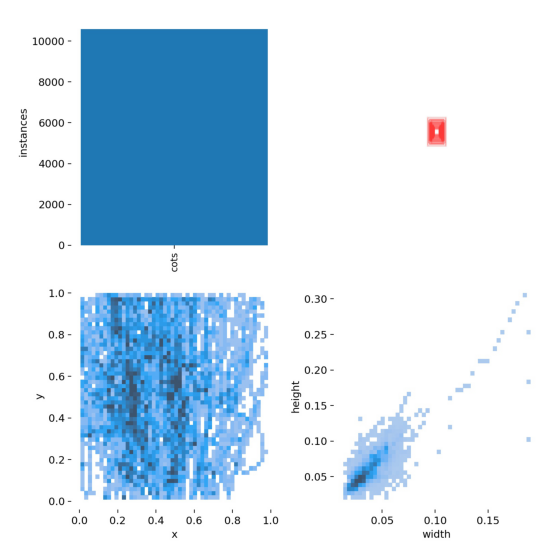

In [54]:
plt.figure(figsize = (20,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/labels.jpg'));


### Batch Image

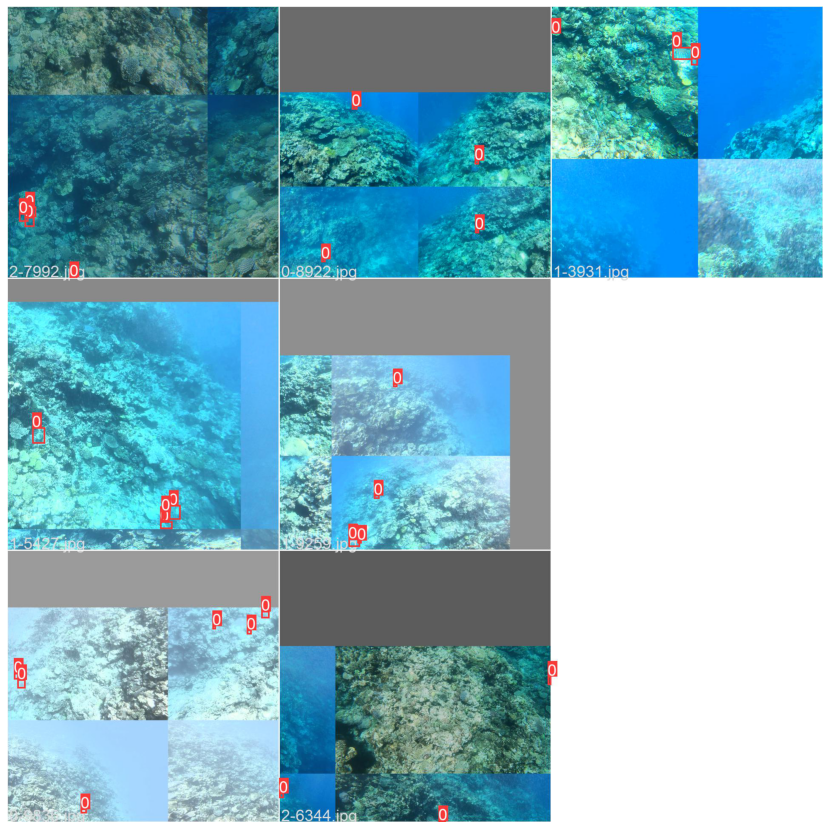

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/train_batch0.jpg'))


## P Curve

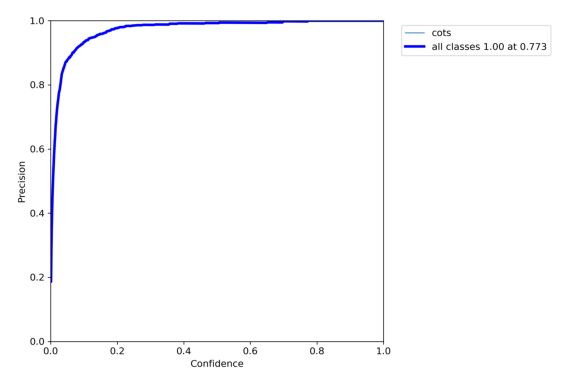

In [46]:
#!ls /kaggle/working/yolov5/kaggle-NFL/exp
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/P_curve.png'));

## PR Curve

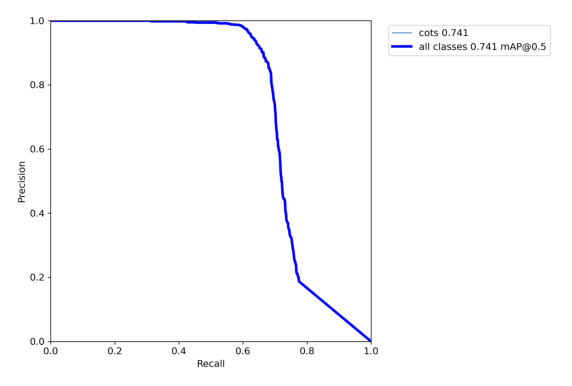

In [47]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/PR_curve.png'));

## F1 Curve

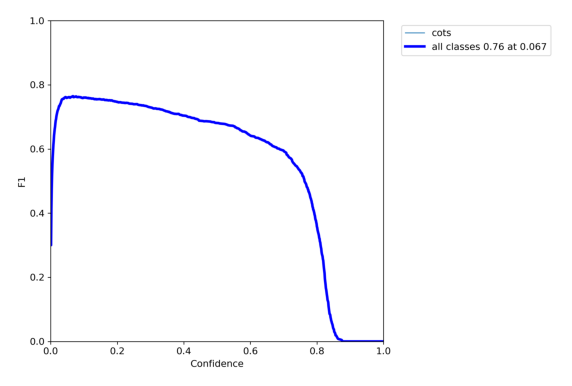

In [49]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/F1_curve.png'));

## R Curve

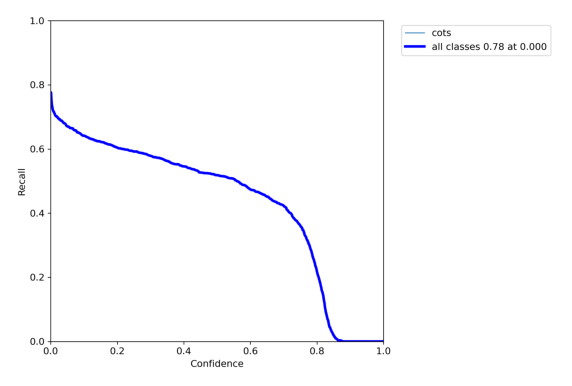

In [55]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/R_curve.png'));

### GT Vs Pred

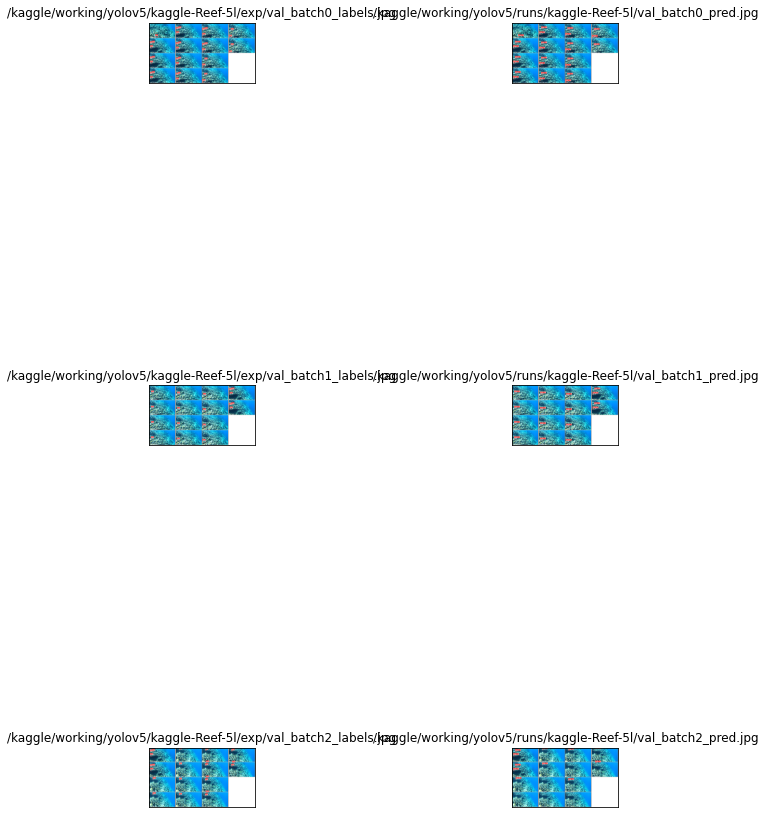

In [56]:
ig, ax = plt.subplots(3, 2, figsize = (2*5,3*5), constrained_layout = True)
for row in range(3):
    ax[row][0].imshow(plt.imread(f'/kaggle/working/yolov5/kaggle-Reef-5l/exp/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/kaggle/working/yolov5/kaggle-Reef-5l/exp/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'/kaggle/working/yolov5/kaggle-Reef-5l/exp/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/kaggle/working/yolov5/runs/kaggle-Reef-5l/val_batch{row}_pred.jpg', fontsize = 12)

### (Loss, Map) Vs Epoch


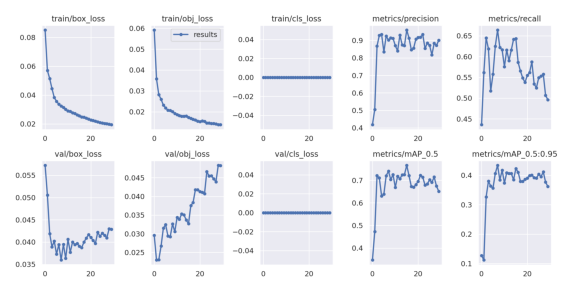

In [51]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/results.png'));

### Confusion Matrix

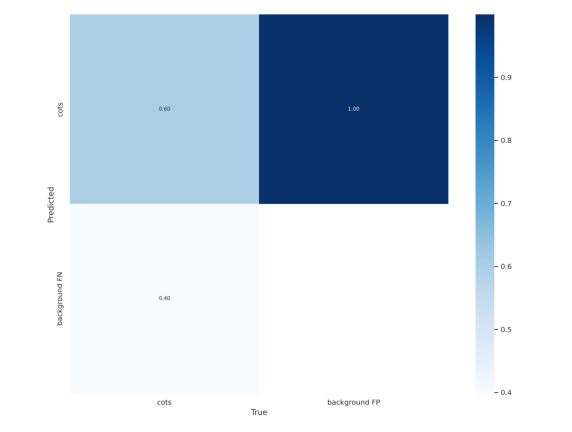

In [52]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/kaggle-Reef-5l/exp/confusion_matrix.png'));

### Please if this kernel is useful, <font color='red'>please upvote !!</font>

# References

1. https://www.kaggle.com/awsaf49/great-barrier-reef-yolov5-train
